

***
***
# 数据抓取
   > # 网易云音乐

***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com


https://github.com/RitterHou/music-163

爬取网易云音乐的所有的歌曲的评论数。以下为主要思路：

- 爬取所有的歌手信息（artists.py）；
- 根据上一步爬取到的歌手信息去爬取所有的专辑信息（album_by _artist.py）；
- 根据专辑信息爬取所有的歌曲信息（music_by _album.py）；
- 根据歌曲信息爬取其评论条数（comments_by _music.py）

# 爬取所有的歌手信息（artists.py）

观察网易云音乐官网页面HTML结构

http://music.163.com/



http://music.163.com/#/discover/artist/cat

http://music.163.com/#/discover/artist/cat?id=4003&initial=0


<div>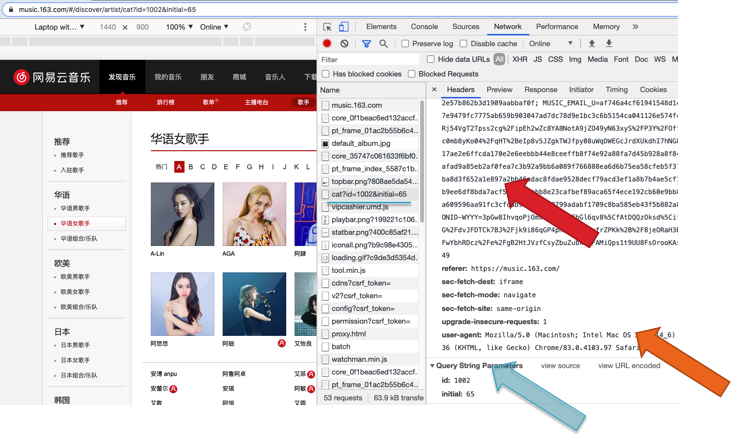</div>


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'zh-CN,zh;q=0.8,en;q=0.6',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Cookie': '_ntes_nnid=7eced19b27ffae35dad3f8f2bf5885cd,1476521011210; _ntes_nuid=7eced19b27ffae35dad3f8f2bf5885cd; usertrack=c+5+hlgB7TgnsAmACnXtAg==; Province=025; City=025; NTES_PASSPORT=6n9ihXhbWKPi8yAqG.i2kETSCRa.ug06Txh8EMrrRsliVQXFV_orx5HffqhQjuGHkNQrLOIRLLotGohL9s10wcYSPiQfI2wiPacKlJ3nYAXgM; P_INFO=hourui93@163.com|1476523293|1|study|11&12|jis&1476511733&mail163#jis&320100#10#0#0|151889&0|g37_client_check&mailsettings&mail163&study&blog|hourui93@163.com; NTES_SESS=Fa2uk.YZsGoj59AgD6tRjTXGaJ8_1_4YvGfXUkS7C1NwtMe.tG1Vzr255TXM6yj2mKqTZzqFtoEKQrgewi9ZK60ylIqq5puaG6QIaNQ7EK5MTcRgHLOhqttDHfaI_vsBzB4bibfamzx1.fhlpqZh_FcnXUYQFw5F5KIBUmGJg7xdasvGf_EgfICWV; S_INFO=1476597594|1|0&80##|hourui93; NETEASE_AUTH_SOURCE=space; NETEASE_AUTH_USERNAME=hourui93; _ga=GA1.2.1405085820.1476521280; JSESSIONID-WYYY=cbd082d2ce2cffbcd5c085d8bf565a95aee3173ddbbb00bfa270950f93f1d8bb4cb55a56a4049fa8c828373f630c78f4a43d6c3d252c4c44f44b098a9434a7d8fc110670a6e1e9af992c78092936b1e19351435ecff76a181993780035547fa5241a5afb96e8c665182d0d5b911663281967d675ff2658015887a94b3ee1575fa1956a5a%3A1476607977016; _iuqxldmzr_=25; __utma=94650624.1038096298.1476521011.1476595468.1476606177.8; __utmb=94650624.20.10.1476606177; __utmc=94650624; __utmz=94650624.1476521011.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'DNT': '1',
    'Host': 'music.163.com',
    'Pragma': 'no-cache',
    'Referer': 'http://music.163.com/',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'
}

In [7]:
group_id = 1001
initial = 67
params = {'id': group_id, 'initial': initial}
r = requests.get('http://music.163.com/discover/artist/cat', params=params, headers=headers)

# 网页解析
soup = BeautifulSoup(r.content.decode(), 'html.parser')
body = soup.body

In [8]:
hotartist_dic = {}
hot_artists = body.find_all('a', attrs={'class': 'msk'})
for artist in hot_artists:
    artist_id = artist['href'].replace('/artist?id=', '').strip()
    artist_name = artist['title'].replace('的音乐', '')
    try:
        hotartist_dic[artist_id] = artist_name
    except Exception as e:
        # 打印错误日志
        print(e)

In [9]:
artist_dic = {}
artists = body.find_all('a', attrs={'class': 'nm nm-icn f-thide s-fc0'})
for artist in artists:
        artist_id = artist['href'].replace('/artist?id=', '').strip()
        artist_name = artist['title'].replace('的音乐', '')
        try:
            artist_dic[artist_id] = artist_name
        except Exception as e:
            # 打印错误日志
            print(e)

In [10]:
artist_dic

{'1007135': '陈小虎',
 '1014024': '茶季杨',
 '1028199': '菜小宝丶',
 '1041027': 'Chace',
 '1043290': '传琦SAMA',
 '1043304': '曹思义',
 '1044054': 'R7CKY',
 '1046063': '蔡方萌',
 '1049979': '陈建斌',
 '1051032': '陈坤',
 '1058228': '陈鸿宇',
 '1060096': '大彻',
 '1081291': 'CloudINJoke',
 '1084178': 'Candy_Wind',
 '1124141': '残泪杰',
 '1132979': '蔡照',
 '1149014': '厨房仔',
 '1152025': '陈知&游园惊梦',
 '12010027': '陈柏霖',
 '12023426': 'CARTA',
 '12079044': '陈硕子',
 '12091078': '崔航',
 '12095299': '陈柯宇',
 '12131566': 'CLOUDWANG 王云',
 '12132471': '陈信喆',
 '12301031': '陈圣夫',
 '12312092': '曹方瑞',
 '12474254': '陈飞宇',
 '12488046': '陈玮镔',
 '12634049': '丛铭君',
 '13056440': '陈立农',
 '13057490': '陈斯琪',
 '13059431': '陈名豪',
 '13228454': '蔡威泽',
 '14100493': '崔伟立',
 '14471208': '陈丙',
 '14713124': '陈彦希REGI',
 '168021': '陈俊彤',
 '168042': '曹寅',
 '189379': '陈鹏杰',
 '2110': '曹格',
 '2111': '崔健',
 '2112': '陈小春',
 '2113': '车继铃',
 '2115': '陈百强',
 '2116': '陈奕迅',
 '2117': '侧田',
 '2118': '成龙',
 '2119': '蔡国庆',
 '2121': '蔡旻佑',
 '2122': '陈冠希',
 '2124': '陈楚生',


In [11]:
def save_artist(group_id, initial, hot_artist_dic, artisti_dic):
    params = {'id': group_id, 'initial': initial}
    r = requests.get('http://music.163.com/discover/artist/cat', params=params)

    # 网页解析
    soup = BeautifulSoup(r.content.decode(), 'html.parser')
    body = soup.body

    hot_artists = body.find_all('a', attrs={'class': 'msk'})
    artists = body.find_all('a', attrs={'class': 'nm nm-icn f-thide s-fc0'})
    for artist in hot_artists:
        artist_id = artist['href'].replace('/artist?id=', '').strip()
        artist_name = artist['title'].replace('的音乐', '')
        try:
            hot_artist_dic[artist_id] = artist_name
        except Exception as e:
            # 打印错误日志
            print(e)

    for artist in artists:
        artist_id = artist['href'].replace('/artist?id=', '').strip()
        artist_name = artist['title'].replace('的音乐', '')
        try:
            artist_dic[artist_id] = artist_name
        except Exception as e:
            # 打印错误日志
            print(e)
    #return artist_dic, hot_artist_dic


In [12]:
gg = 1001
initial = 67
artist_dic = {}
hot_artist_dic = {} 
save_artist(gg, initial, hot_artist_dic, artist_dic  )

In [13]:
artist_dic

{'1007135': '陈小虎',
 '1014024': '茶季杨',
 '1028199': '菜小宝丶',
 '1041027': 'Chace',
 '1043290': '传琦SAMA',
 '1043304': '曹思义',
 '1044054': 'R7CKY',
 '1046063': '蔡方萌',
 '1049979': '陈建斌',
 '1051032': '陈坤',
 '1058228': '陈鸿宇',
 '1060096': '大彻',
 '1081291': 'CloudINJoke',
 '1084178': 'Candy_Wind',
 '1124141': '残泪杰',
 '1132979': '蔡照',
 '1149014': '厨房仔',
 '1152025': '陈知&游园惊梦',
 '12010027': '陈柏霖',
 '12023426': 'CARTA',
 '12079044': '陈硕子',
 '12091078': '崔航',
 '12095299': '陈柯宇',
 '12131566': 'CLOUDWANG 王云',
 '12132471': '陈信喆',
 '12301031': '陈圣夫',
 '12312092': '曹方瑞',
 '12474254': '陈飞宇',
 '12488046': '陈玮镔',
 '12634049': '丛铭君',
 '13056440': '陈立农',
 '13057490': '陈斯琪',
 '13059431': '陈名豪',
 '13228454': '蔡威泽',
 '14100493': '崔伟立',
 '14471208': '陈丙',
 '14713124': '陈彦希REGI',
 '168021': '陈俊彤',
 '168042': '曹寅',
 '189379': '陈鹏杰',
 '2110': '曹格',
 '2111': '崔健',
 '2112': '陈小春',
 '2113': '车继铃',
 '2115': '陈百强',
 '2116': '陈奕迅',
 '2117': '侧田',
 '2118': '成龙',
 '2119': '蔡国庆',
 '2121': '蔡旻佑',
 '2122': '陈冠希',
 '2124': '陈楚生',


In [14]:
artist_dic = {}
hot_artist_dic = {} 
for i in range(65, 91):
    print(i)
    save_artist(gg, i, hot_artist_dic, artist_dic  )

65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [15]:
len(hot_artist_dic)

260

In [16]:
len(artist_dic)

2329

# 爬取所有的专辑信息（album_by _artist.py）

In [68]:
list(hot_artist_dic.keys())[0]

'89659'

http://music.163.com/#/artist/album?id=89659&limit=400

In [ ]:
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'zh-CN,zh;q=0.8,en;q=0.6',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Cookie': '_ntes_nnid=7eced19b27ffae35dad3f8f2bf5885cd,1476521011210; _ntes_nuid=7eced19b27ffae35dad3f8f2bf5885cd; usertrack=c+5+hlgB7TgnsAmACnXtAg==; Province=025; City=025; _ga=GA1.2.1405085820.1476521280; NTES_PASSPORT=6n9ihXhbWKPi8yAqG.i2kETSCRa.ug06Txh8EMrrRsliVQXFV_orx5HffqhQjuGHkNQrLOIRLLotGohL9s10wcYSPiQfI2wiPacKlJ3nYAXgM; P_INFO=hourui93@163.com|1476523293|1|study|11&12|jis&1476511733&mail163#jis&320100#10#0#0|151889&0|g37_client_check&mailsettings&mail163&study&blog|hourui93@163.com; JSESSIONID-WYYY=189f31767098c3bd9d03d9b968c065daf43cbd4c1596732e4dcb471beafe2bf0605b85e969f92600064a977e0b64a24f0af7894ca898b696bd58ad5f39c8fce821ec2f81f826ea967215de4d10469e9bd672e75d25f116a9d309d360582a79620b250625859bc039161c78ab125a1e9bf5d291f6d4e4da30574ccd6bbab70b710e3f358f%3A1476594130342; _iuqxldmzr_=25; __utma=94650624.1038096298.1476521011.1476588849.1476592408.6; __utmb=94650624.11.10.1476592408; __utmc=94650624; __utmz=94650624.1476521011.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    'DNT': '1',
    'Host': 'music.163.com',
    'Pragma': 'no-cache',
    'Referer': 'http://music.163.com/',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'
}

In [18]:
def save_albums(artist_id, albume_dic):
    params = {'id': artist_id, 'limit': '200'}
    # 获取歌手个人主页
    r = requests.get('http://music.163.com/artist/album', headers=headers, params=params)

    # 网页解析
    soup = BeautifulSoup(r.content.decode(), 'html.parser')
    body = soup.body

    albums = body.find_all('a', attrs={'class': 'tit s-fc0'})  # 获取所有专辑

    for album in albums:
        albume_id = album['href'].replace('/album?id=', '')
        albume_dic[albume_id] = artist_id

In [19]:
albume_dic = {}
save_albums('2116', albume_dic)

In [20]:
albume_dic

{'2261058': '2116',
 '2261091': '2116',
 '2261147': '2116',
 '2302128': '2116',
 '2332713': '2116',
 '2336647': '2116',
 '2339617': '2116',
 '2374009': '2116',
 '2374010': '2116',
 '2374011': '2116',
 '2374012': '2116',
 '2374013': '2116',
 '2374014': '2116',
 '2465020': '2116',
 '2518003': '2116',
 '2532179': '2116',
 '2621232': '2116',
 '2692238': '2116',
 '2692239': '2116',
 '2692242': '2116',
 '2732645': '2116',
 '2767144': '2116',
 '2786670': '2116',
 '2793003': '2116',
 '2801259': '2116',
 '3070638': '2116',
 '3102567': '2116',
 '3109376': '2116',
 '3170625': '2116',
 '3184340': '2116',
 '3211014': '2116',
 '3279543': '2116',
 '3279818': '2116',
 '3319407': '2116',
 '3391071': '2116',
 '3404003': '2116',
 '34611604': '2116',
 '34735139': '2116',
 '34881554': '2116',
 '34923261': '2116',
 '34961173': '2116',
 '35398900': '2116',
 '35406784': '2116',
 '35411774': '2116',
 '35520072': '2116',
 '35643233': '2116',
 '35663692': '2116',
 '35835294': '2116',
 '36304576': '2116',
 '38296

# 根据专辑信息爬取所有的歌曲信息（music_by _album.py）

In [21]:
def save_music(album_id, music_dic):
    params = {'id': album_id}
    # 获取专辑对应的页面
    r = requests.get('http://music.163.com/album', headers=headers, params=params)
    # 网页解析
    soup = BeautifulSoup(r.content.decode(), 'html.parser')
    body = soup.body
    musics = body.find('ul', attrs={'class': 'f-hide'}).find_all('li')  # 获取专辑的所有音乐
    for music in musics:
        music = music.find('a')
        music_id = music['href'].replace('/song?id=', '')
        music_name = music.getText()
        music_dic[music_id] = [music_name, album_id]

In [73]:
list(albume_dic.keys())[0]

'37110871'

In [22]:
music_dic = {}
save_music('6423', music_dic)

In [23]:
music_dic

{'65321': ['兄妹', '6423'],
 '65326': ['十年', '6423'],
 '65334': ['你的背包', '6423'],
 '65337': ['K歌之王', '6423'],
 '65342': ['Shall We Talk', '6423'],
 '65347': ['低等动物', '6423'],
 '65350': ['寂寞让你更快乐', '6423'],
 '65355': ['圣诞结', '6423'],
 '65360': ['想哭', '6423'],
 '65365': ['不如这样', '6423'],
 '65369': ['你会不会', '6423'],
 '65373': ['Last Order', '6423'],
 '65377': ['冤家', '6423'],
 '65381': ['全世界失眠', '6423'],
 '65385': ['我们都寂寞', '6423'],
 '65389': ['阿怪', '6423'],
 '65393': ['谢谢侬', '6423'],
 '65397': ['爱是怀疑', '6423'],
 '65400': ["Because You're Good To Me", '6423'],
 '65403': ['Good Times', '6423'],
 '65406': ['要你的', '6423'],
 '65410': ['像一句广告', '6423'],
 '65414': ['我也不会那样做', '6423'],
 '65418': ['人造卫星', '6423'],
 '65421': ['狂人日记', '6423'],
 '65425': ['没有手机的日子', '6423'],
 '65429': ['跳蚤市场', '6423'],
 '65433': ['故事', '6423'],
 '65437': ['男人的错', '6423'],
 '65441': ['没有你', '6423']}

# 根据歌曲信息爬取其评论条数（comments_by _music.py

http://music.163.com/#/song?id=516997458


很遗憾的是评论数虽然也在详情页内，但是网易云音乐做了防爬处理，
- 采用AJAX调用评论数API的方式填充评论相关数据，
- 异步的特性导致我们爬到的页面中评论数是空，

我们就找一找这个API吧，通关观察XHR请求发现是下面这个家伙..

响应结果很丰富呢，所有评论相关的数据都有，不过经过观察发现这个API是经过加密处理的，不过没关系...

https://blog.csdn.net/python233/article/details/72825003

https://www.zhihu.com/question/36081767


In [29]:
params = {
    'csrf_token': ''
}

data = {
    'params': '5L+s/X1qDy33tb2sjT6to2T4oxv89Fjg1aYRkjgzpNPR6hgCpp0YVjNoTLQAwWu9VYvKROPZQj6qTpBK+sUeJovyNHsnU9/StEfZwCOcKfECFFtAvoNIpulj1TDOtBir',
    'encSecKey': '59079f3e07d6e240410018dc871bf9364f122b720c0735837d7916ac78d48a79ec06c6307e6a0e576605d6228bd0b377a96e1a7fc7c7ddc8f6a3dc6cc50746933352d4ec5cbe7bddd6dcb94de085a3b408d895ebfdf2f43a7c72fc783512b3c9efb860679a88ef21ccec5ff13592be450a1edebf981c0bf779b122ddbd825492'
    
}

In [155]:
print(url)

http://music.163.com/api/v1/resource/comments/R_SO_4_516997458?limit=20&offset=0


In [26]:
offset = 0
music_id = '65337'
url = 'http://music.163.com/api/v1/resource/comments/R_SO_4_'+ music_id + '?limit=20&offset=' + str(offset)
response = requests.post(url, headers=headers, data=data)
cj = response.json()
cj.keys()

dict_keys(['moreHot', 'userId', 'comments', 'topComments', 'more', 'isMusician', 'code', 'hotComments', 'total'])

In [27]:
cj['total'],len(cj['comments']), len(cj['hotComments']), len(cj['topComments'])

(19987, 20, 15, 0)

In [28]:
cj['comments'][0]

{'beReplied': [],
 'commentId': 1446073367,
 'commentLocationType': 0,
 'content': '没人评论了？',
 'decoration': {},
 'expressionUrl': None,
 'liked': False,
 'likedCount': 35,
 'parentCommentId': 0,
 'pendantData': None,
 'repliedMark': False,
 'showFloorComment': None,
 'status': 0,
 'time': 1554742251254,
 'user': {'authStatus': 0,
  'avatarUrl': 'http://p2.music.126.net/57TAbI-npfKuVhTFn8k-eQ==/109951163040243157.jpg',
  'expertTags': None,
  'experts': None,
  'liveInfo': None,
  'locationInfo': None,
  'nickname': 'booxs',
  'remarkName': None,
  'userId': 111179639,
  'userType': 0,
  'vipRights': {'associator': None,
   'musicPackage': {'rights': True, 'vipCode': 220},
   'redVipAnnualCount': -1},
  'vipType': 10}}

## 翻页的实现

limit是一页的数量，offset往后的偏移。
- 比如limit是20，offset是40，就展示第三页的

http://music.163.com/api/v1/resource/comments/R_SO_4_516997458?limit=20&offset=0

http://music.163.com/api/v1/resource/comments/R_SO_4_516997458?limit=20&offset=20

http://music.163.com/api/v1/resource/comments/R_SO_4_516997458?limit=20&offset=40

## 另外一种方法

In [129]:
from Crypto.Cipher import AES
import base64
import requests
import json
import time

# headers
headers = {
    'Host': 'music.163.com',
    'Connection': 'keep-alive',
    'Content-Length': '484',
    'Cache-Control': 'max-age=0',
    'Origin': 'http://music.163.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.84 Safari/537.36',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': '*/*',
    'DNT': '1',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'zh-CN,zh;q=0.8,en;q=0.6,zh-TW;q=0.4',
    'Cookie': 'JSESSIONID-WYYY=b66d89ed74ae9e94ead89b16e475556e763dd34f95e6ca357d06830a210abc7b685e82318b9d1d5b52ac4f4b9a55024c7a34024fddaee852404ed410933db994dcc0e398f61e670bfeea81105cbe098294e39ac566e1d5aa7232df741870ba1fe96e5cede8372ca587275d35c1a5d1b23a11e274a4c249afba03e20fa2dafb7a16eebdf6%3A1476373826753; _iuqxldmzr_=25; _ntes_nnid=7fa73e96706f26f3ada99abba6c4a6b2,1476372027128; _ntes_nuid=7fa73e96706f26f3ada99abba6c4a6b2; __utma=94650624.748605760.1476372027.1476372027.1476372027.1; __utmb=94650624.4.10.1476372027; __utmc=94650624; __utmz=94650624.1476372027.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
}



#获取params
def get_params(first_param, forth_param):
    iv = "0102030405060708"
    first_key = forth_param
    second_key = 16 * 'F'
    h_encText = AES_encrypt(first_param, first_key.encode(), iv.encode())
    h_encText = AES_encrypt(h_encText.decode(), second_key.encode(), iv.encode())
    return h_encText.decode()


# 获取encSecKey
def get_encSecKey():
    encSecKey = "257348aecb5e556c066de214e531faadd1c55d814f9be95fd06d6bff9f4c7a41f831f6394d5a3fd2e3881736d94a02ca919d952872e7d0a50ebfa1769a7a62d512f5f1ca21aec60bc3819a9c3ffca5eca9a0dba6d6f7249b06f5965ecfff3695b54e1c28f3f624750ed39e7de08fc8493242e26dbc4484a01c76f739e135637c"
    return encSecKey


# 解AES秘
def AES_encrypt(text, key, iv):
    pad = 16 - len(text) % 16
    text = text + pad * chr(pad)
    encryptor = AES.new(key, AES.MODE_CBC, iv)
    encrypt_text = encryptor.encrypt(text.encode())
    encrypt_text = base64.b64encode(encrypt_text)
    return encrypt_text


# 获取json数据
def get_json(url, data):
    response = requests.post(url, headers=headers, data=data)
    return response.content


# 传入post数据
def crypt_api(id, offset):
    url = "http://music.163.com/weapi/v1/resource/comments/R_SO_4_%s/?csrf_token=" % id
    first_param = "{rid:\"\", offset:\"%s\", total:\"true\", limit:\"20\", csrf_token:\"\"}" % offset
    forth_param = "0CoJUm6Qyw8W8jud"
    params = get_params(first_param, forth_param)
    encSecKey = get_encSecKey()
    data = {
        "params": params,
        "encSecKey": encSecKey
    }
    return url, data



In [138]:
offset = 0
id = '516997458'
url, data = crypt_api(id, offset)
json_text = get_json(url, data)
json_dict = json.loads(json_text.decode("utf-8"))
comments_sum = json_dict['total']
comments_sum

8054

In [139]:
len(json_dict['comments'])

20

In [140]:
json_dict['comments'][0]

{'beReplied': [],
 'commentId': 1112523641,
 'content': '喜欢双笙，喜欢这首歌',
 'isRemoveHotComment': False,
 'liked': False,
 'likedCount': 1,
 'pendantData': None,
 'time': 1525904882188,
 'user': {'authStatus': 0,
  'avatarUrl': 'http://p1.music.126.net/Eklu6D8QoR1Hb5UhLhCzPw==/109951163288324813.jpg',
  'expertTags': None,
  'experts': None,
  'locationInfo': None,
  'nickname': '狂妄嘻嘻',
  'remarkName': None,
  'userId': 1451756393,
  'userType': 0,
  'vipType': 0}}

In [141]:
json_dict['comments'][4]

{'beReplied': [{'content': '我们历史老师是一个年轻的小伙子。那是个阳光明媚的中午，他拖堂拖了很久，喇叭里响起了学校广播“校园之声”的开场白，接着就是这首歌。老师听到这首歌前奏后，自以为是地说一定是播音员自己唱的。我们都在下面反驳他，说人家歌就是这样的。。\n而现在，距中考只有58天了，毕业后，就回不去了。',
   'status': 0,
   'user': {'authStatus': 0,
    'avatarUrl': 'http://p1.music.126.net/gm976KYbWTvYvExzjBNeaw==/109951163217371336.jpg',
    'expertTags': None,
    'experts': None,
    'locationInfo': None,
    'nickname': '惴洛',
    'remarkName': None,
    'userId': 1325932231,
    'userType': 0,
    'vipType': 0}}],
 'commentId': 1112261542,
 'content': '还有不到一个月了高一学姐祝你考试加油哦',
 'isRemoveHotComment': False,
 'liked': False,
 'likedCount': 0,
 'pendantData': None,
 'time': 1525876023865,
 'user': {'authStatus': 0,
  'avatarUrl': 'http://p1.music.126.net/kAuCCkW-fcC7yu4wix9z5Q==/109951163144186242.jpg',
  'expertTags': None,
  'experts': None,
  'locationInfo': None,
  'nickname': '土园yy',
  'remarkName': None,
  'userId': 275653796,
  'userType': 0,
  'vipType': 0}}

In [135]:
offset = 20
id = '516997458'
url, data = crypt_api(id, offset)
json_text = get_json(url, data)
json_dict = json.loads(json_text.decode("utf-8"))
comments_sum = json_dict['total']
json_dict['comments'][0]

{'beReplied': [],
 'commentId': 1107837178,
 'content': '冥月声音好听好温柔[爱心]表白',
 'isRemoveHotComment': False,
 'liked': False,
 'likedCount': 3,
 'pendantData': None,
 'time': 1525515089450,
 'user': {'authStatus': 0,
  'avatarUrl': 'http://p1.music.126.net/suhvzXk2pEUOaeHUPU0aQQ==/109951163173870029.jpg',
  'expertTags': None,
  'experts': None,
  'locationInfo': None,
  'nickname': '黴祇',
  'remarkName': None,
  'userId': 619018018,
  'userType': 0,
  'vipType': 0}}

In [136]:
offset = 40
id = '516997458'
url, data = crypt_api(id, offset)
json_text = get_json(url, data)
json_dict = json.loads(json_text.decode("utf-8"))
comments_sum = json_dict['total']
json_dict['comments'][0]

{'beReplied': [],
 'commentId': 1102303635,
 'content': '找这首歌找了好久了！！无厘头的找，今天无意居然听到了(*^▽^)/★*☆',
 'isRemoveHotComment': False,
 'liked': False,
 'likedCount': 1,
 'pendantData': None,
 'time': 1525072647936,
 'user': {'authStatus': 0,
  'avatarUrl': 'http://p1.music.126.net/fU8tvMVN2f5WkSUZehQ21Q==/3274345636764863.jpg',
  'expertTags': None,
  'experts': None,
  'locationInfo': None,
  'nickname': '黎诺0',
  'remarkName': None,
  'userId': 129375977,
  'userType': 0,
  'vipType': 0}}

In [170]:
800/1018*460  

361.49312377210214